In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
X1, Y1 = make_classification(n_samples=5000,n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

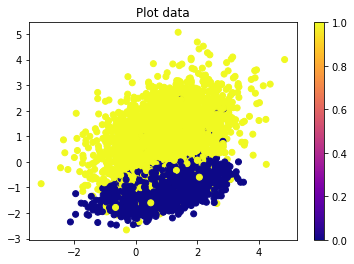

In [3]:
plt.title("Plot data")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="plasma")
plt.colorbar()

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

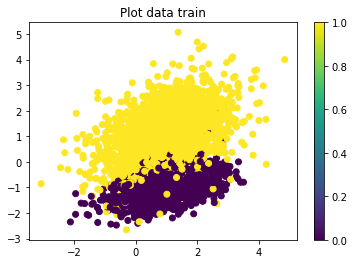

In [5]:
plt.title("Plot data train")
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.colorbar()

In [6]:
classifier = SGDClassifier(loss="log",
                           alpha=0.0001,verbose=1,epsilon=0.1,max_iter=2000)

In [7]:
classifier.fit(x_train,y_train)

-- Epoch 1
Norm: 9.50, NNZs: 2, Bias: 7.951925, T: 4000, Avg. loss: 0.794277
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.51, NNZs: 2, Bias: 5.294339, T: 8000, Avg. loss: 0.337912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.38, NNZs: 2, Bias: 3.286604, T: 12000, Avg. loss: 0.261475
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.62, NNZs: 2, Bias: 3.529443, T: 16000, Avg. loss: 0.242869
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.08, NNZs: 2, Bias: 3.145789, T: 20000, Avg. loss: 0.230079
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.02, NNZs: 2, Bias: 2.936499, T: 24000, Avg. loss: 0.227949
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.66, NNZs: 2, Bias: 2.598002, T: 28000, Avg. loss: 0.218838
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.29, NNZs: 2, Bias: 2.504758, T: 32000, Avg. loss: 0.219602
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.58, NNZs: 2, Bias: 3.001597, T: 36000, Avg. loss: 0.218034
Total training time:

SGDClassifier(loss='log', max_iter=2000, verbose=1)

In [8]:
score = classifier.score(x_test,y_test)
print("Le score est {}".format(score))

Le score est 0.924


In [9]:
maxX1 = np.max(X1[:,0])
minX1 = np.min(X1[:,0])
maxX2 = np.max(X1[:,1])
minX2 = np.min(X1[:,1])
x1 = []
x2 = []
for i in np.arange(minX1,maxX1,0.01):
    for j in np.arange(minX2,maxX2,0.01):
        x1.append(i)
        x2.append(j)

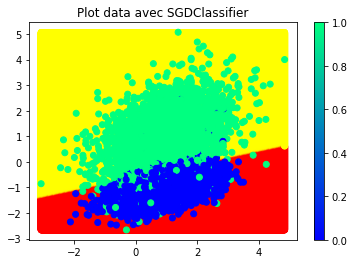

In [10]:
plt.title("Plot data avec SGDClassifier")
plt.scatter(x1,x2,c=classifier.predict(np.vstack((x1,x2)).T),cmap="autumn")
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap="winter")
plt.colorbar()

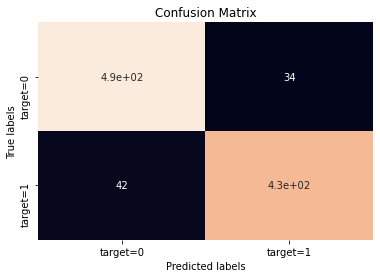

In [11]:
cm = confusion_matrix(y_true=y_test, y_pred=classifier.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

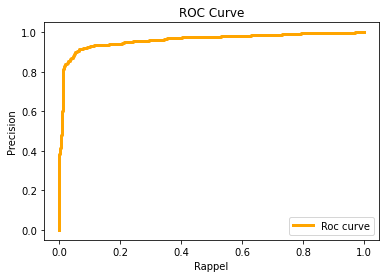

In [12]:
y_test_pred = classifier.decision_function(x_test)
fpr, tpr, thr = roc_curve(y_test, y_test_pred)
plt.title("ROC Curve")
plt.plot(fpr,tpr,lw=3,ls="-",label="Roc curve",c="orange")
plt.xlabel("Rappel")
plt.ylabel("Precision")
plt.legend()